In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


np.random.seed(42)

n = 50

x = np.linspace(-1,1,n)
y = 1/(1+25*x**2) 
y = y.reshape(n,1) 
y_noise = y + np.random.normal(0,0.1)


def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

def polynomial_features(x, p, intercept=False):
    n = len(x)
    k = 0
    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1
        k += 1
    else:
        X = np.zeros((n, p))

    for i in range(1, p +1):
        X[:, i + k-1] = x**i 
    return X
def Gradient_Ridge(X, y, theta lambda_param=1.0,n=100):
    return (2.0/n)*X.T @ (X @ theta-y) + 2*lambda_param*theta 
def Gradient_OLS(X, y,theta,  n=100):
    return (2.0/n)*X.T @ (X @ theta-y)



## Pard d : Including ommentum and more advanced ways to update learning rate

We keep our focus on OLS and Ridge regression and update our code for the gradient descent
method by including momentum, ADAgrad, RMSprop and ADAM as methods fro iteratively
updating your learning rate. Discuss the results and compare the different methods applied to the
one-dimensional Runge function. The lecture notes from week 37 contain several examples on how
to implement these methods

#### Using momentum



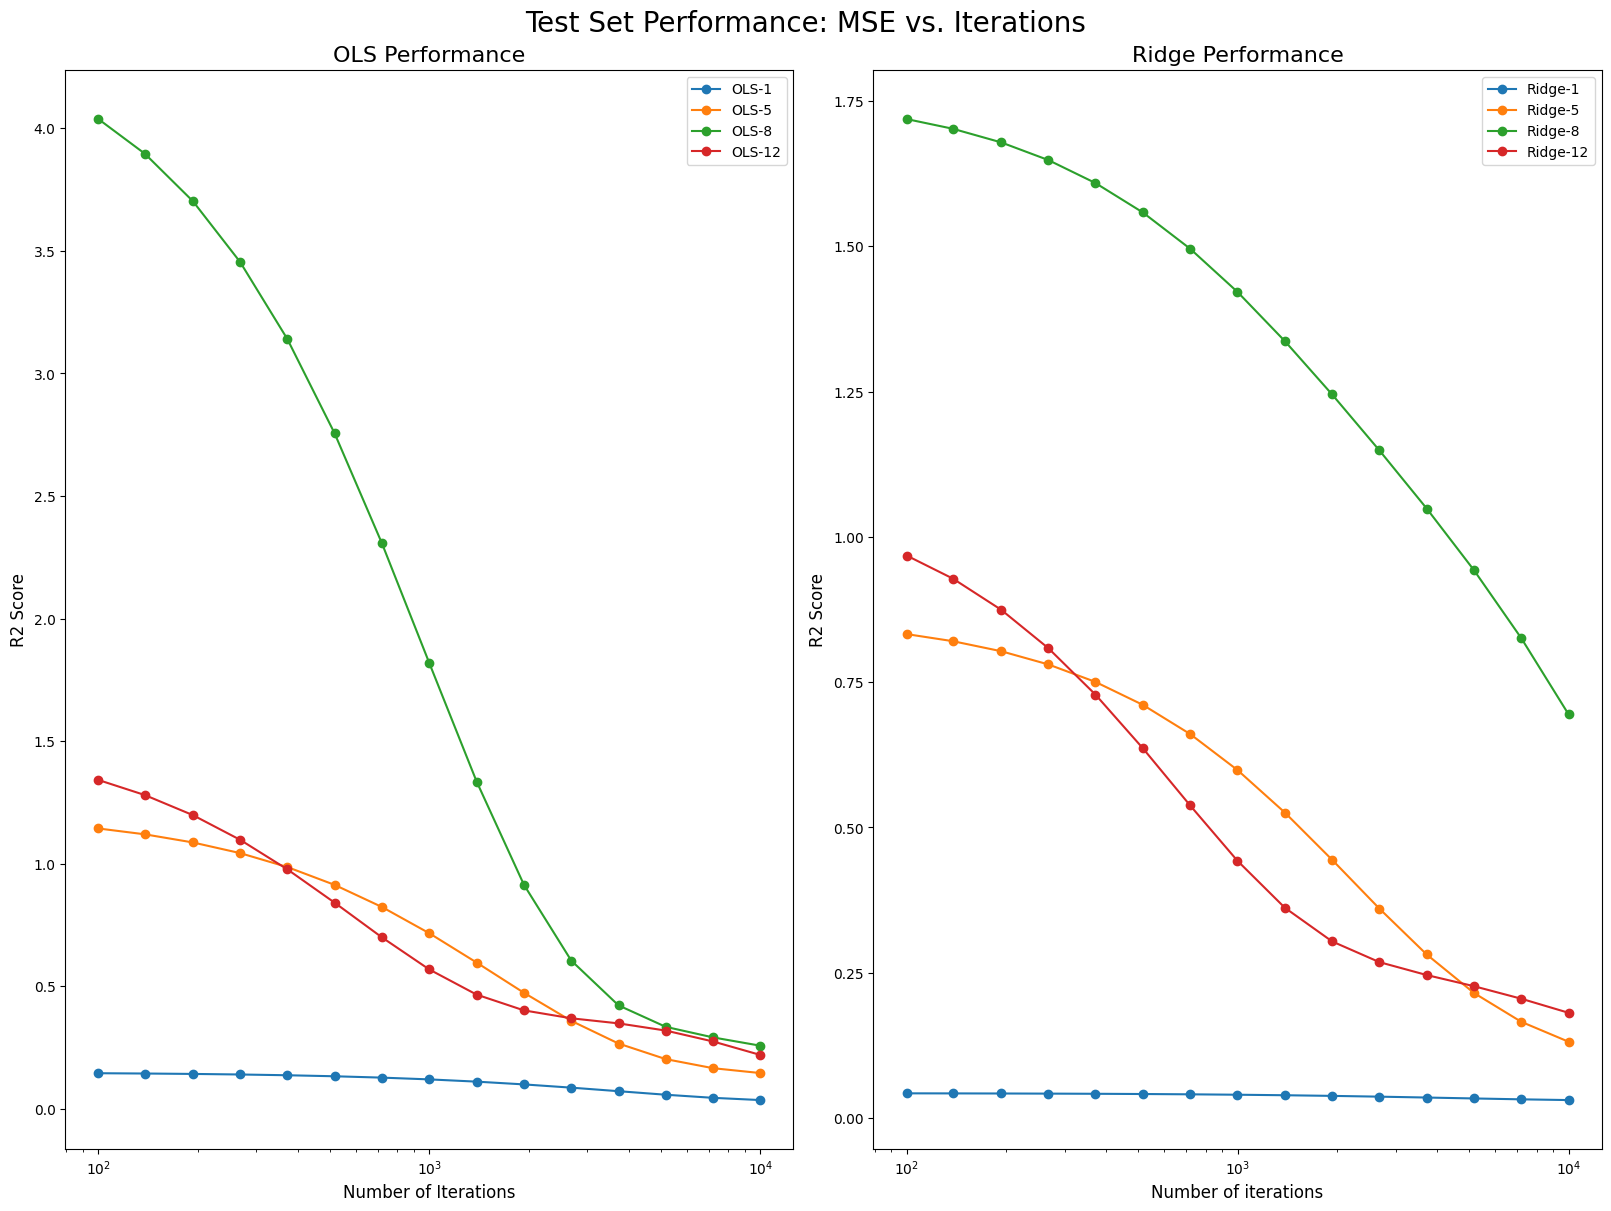

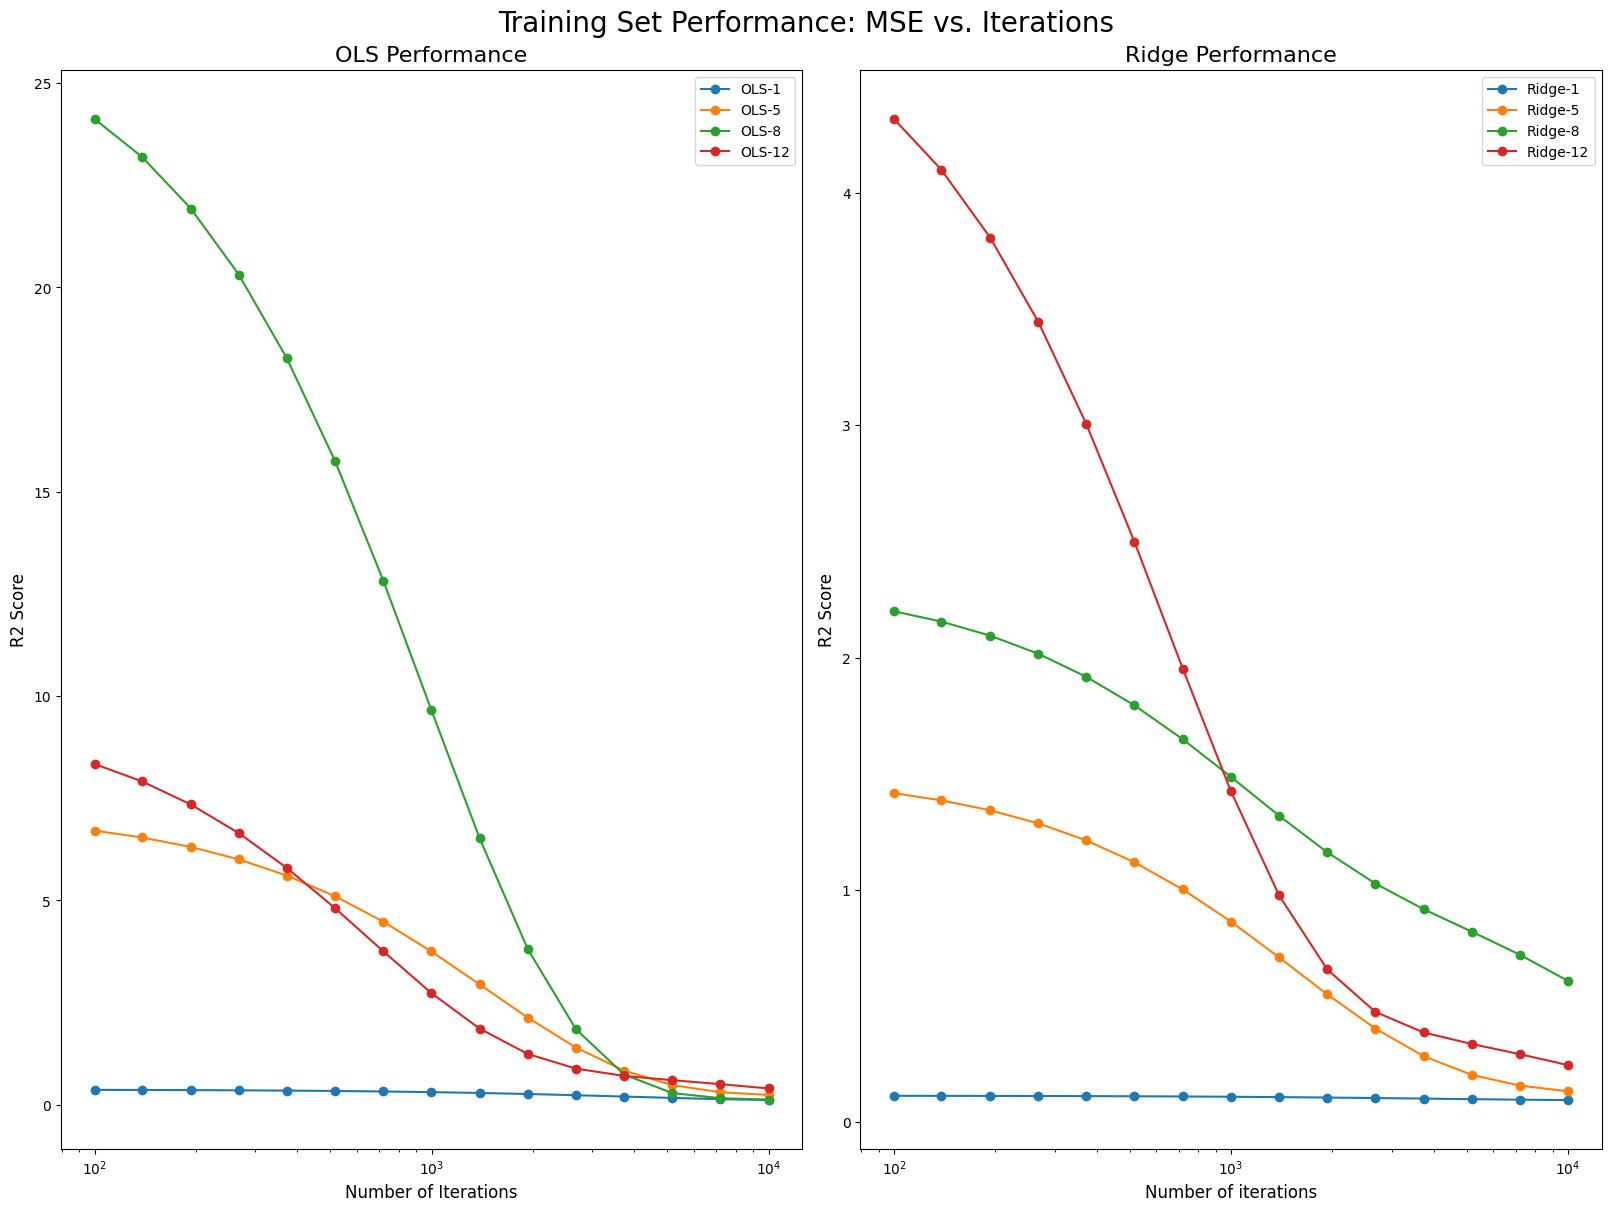

In [8]:
#GRADIENT DESCENT WITH MOMENTUM

# Gradient descent parameters, learning rate eta first
eta = 0.0001
lam = 0.001
# Then number of iterations
num_iters = 10000
degrees = [1,5,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)

        momentum = 0.3
        change = 0
        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad = Gradient_OLS(X_train, y_train, theta=theta)
            elif key =="Ridge":
                grad= Gradient_Ridge(X_train, y_train, lambda_param=lam,theta=theta)
            new_change =  eta * grad + momentum * change
            theta -= new_change
            change = new_change

            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))

def plot_mse_vs_iterations(results_dict, title):
    """Helper function to plot MSE vs. iterations."""
    fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 12), constrained_layout=True)
    fig.suptitle(title, fontsize=20)
    for degree in degrees:
        ax1.plot(iter_saves, results_dict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")

        ax2.plot(iter_saves, results_dict["Ridge"][degree]["mse"], 'o-', label=f"Ridge-{degree}")
    
    ax1.set_title("OLS Performance", fontsize=16)
    ax1.set_xlabel("Number of Iterations", fontsize=12)
    ax1.set_xscale('log')
    ax1.set_ylabel("R2 Score", fontsize=12)
    ax1.legend(fontsize=10)

    ax2.set_title("Ridge Performance", fontsize=16)
    ax2.set_xlabel("Number of Iterations", fontsize=12)
    ax2.set_xscale('log')
    ax2.set_ylabel("R2 Score", fontsize=12)
    ax2.legend(fontsize=10)

    plt.xlabel("Number of iterations")
    plt.show()

plot_mse_vs_iterations(plot_predict, "Test Set Performance: MSE vs. Iterations")
plot_mse_vs_iterations(plot_train, "Training Set Performance: MSE vs. Iterations")


Now do this and see what happens when momentum is changed, perhaps also when:
- Momentum is changed
- Points are changed
- Learning rate is changed
- regularization for Ridge
- Dimensionality is changed



#### Adagrad

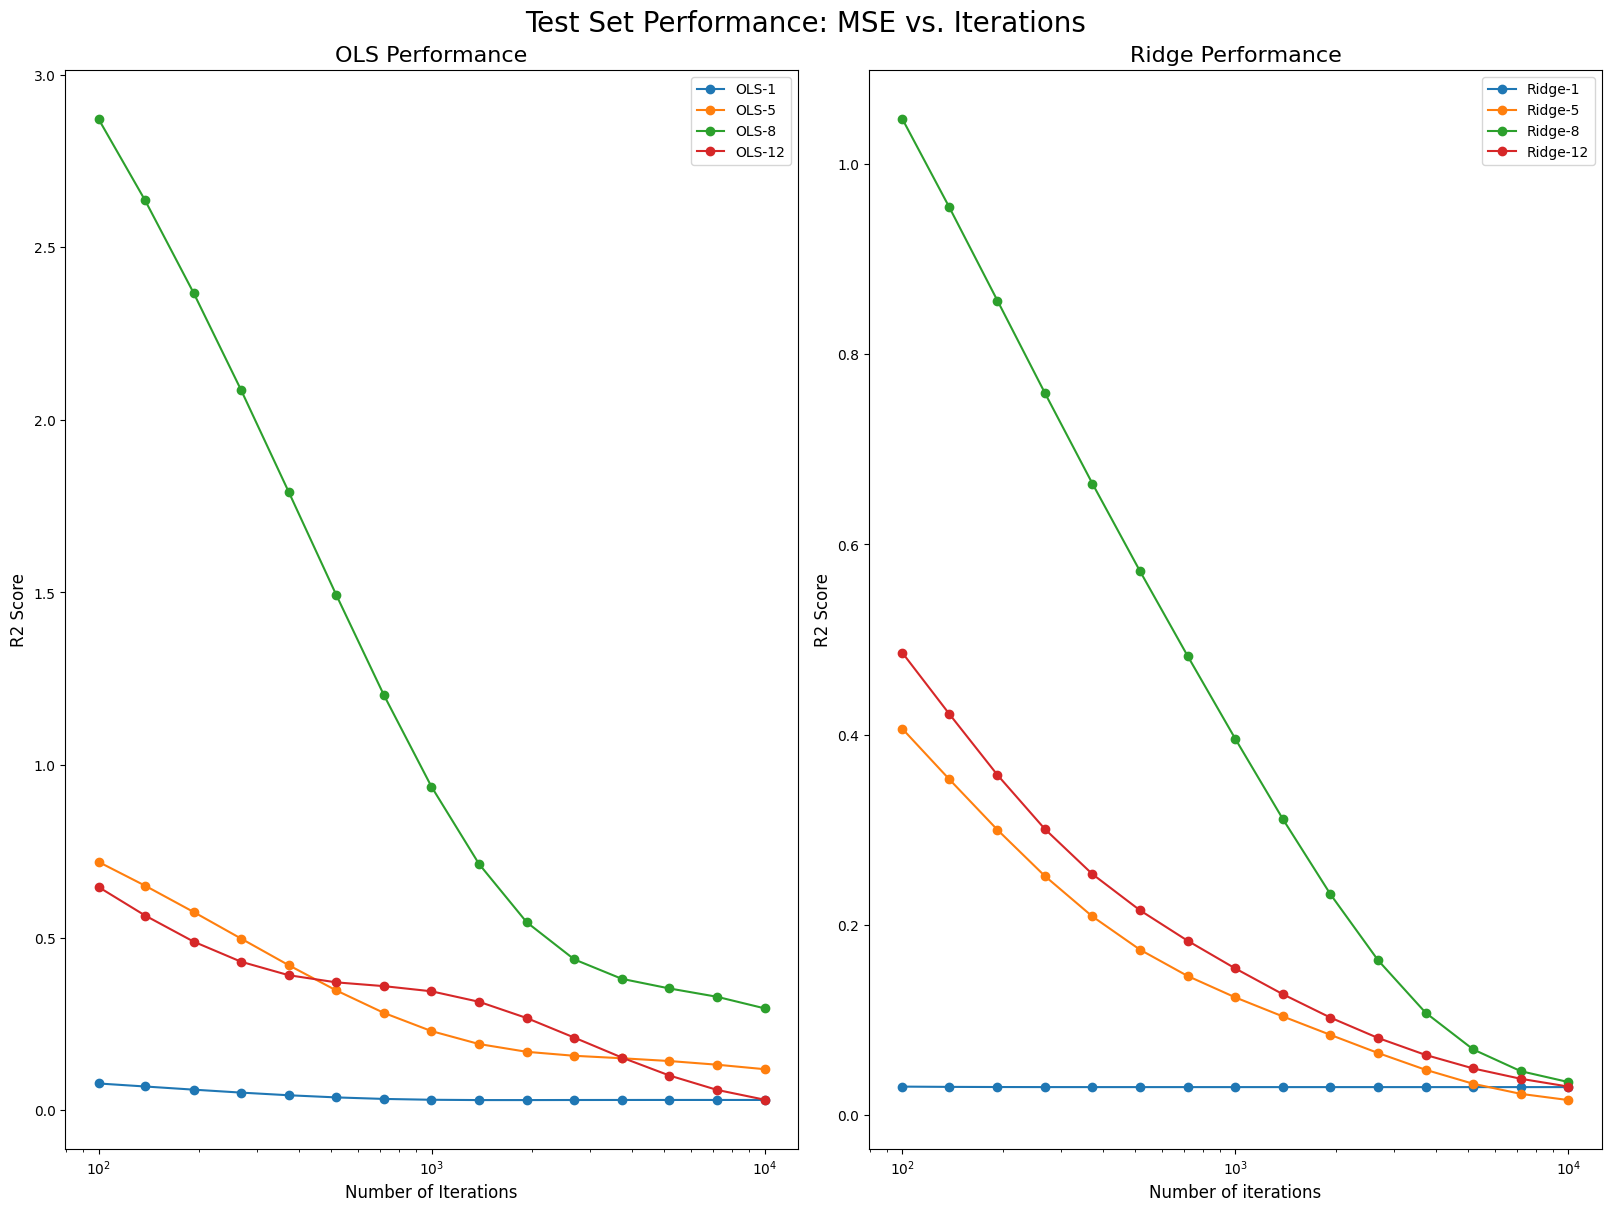

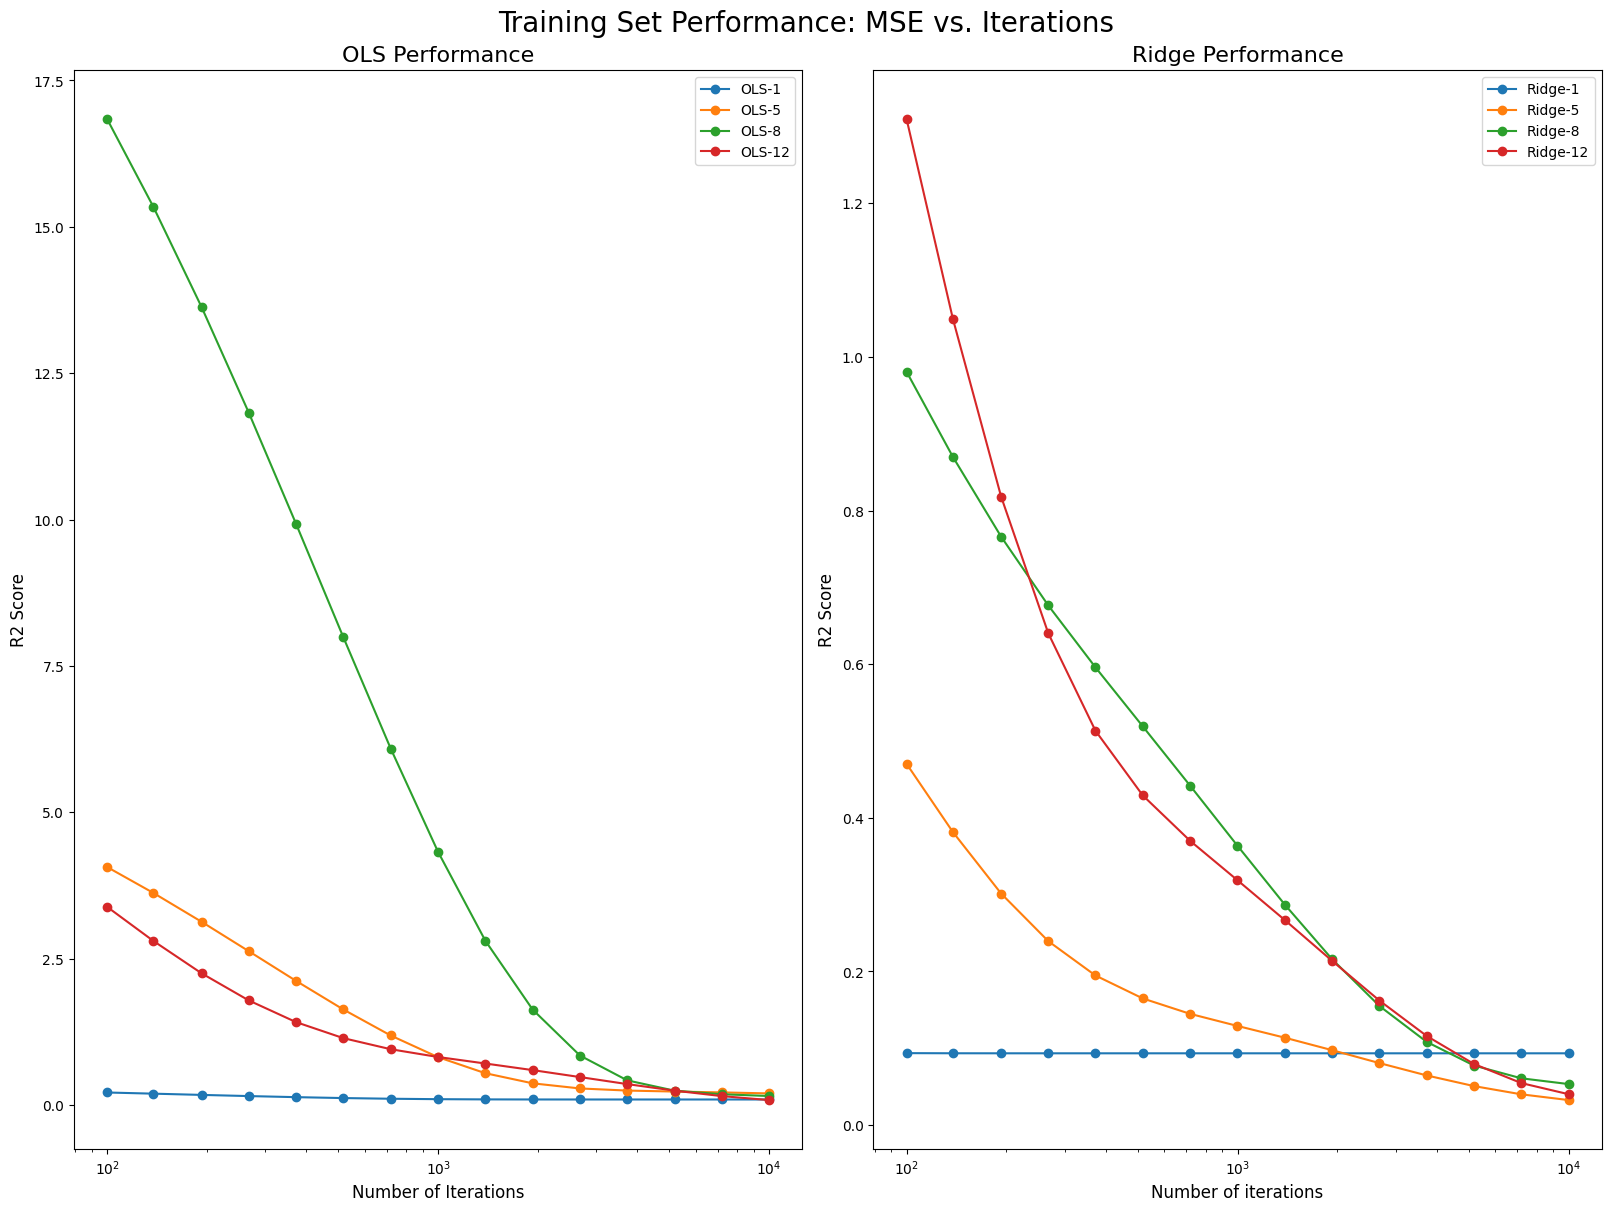

In [9]:
#ADAGRAD

# Gradient descent parameters, regularization paramter
eta = 0.01
lam = 0.001
delta = 1e-8
# Then number of iterations
num_iters = 10000
degrees = [1,5,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)
        giter = np.zeros((X_train.shape[1],1))

        change = 0
        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad = Gradient_OLS(X_train, y_train, theta=theta)
            elif key =="Ridge":
                grad= Gradient_Ridge(X_train, y_train,  lambda_param=lam,theta=theta)
            giter += grad*grad
            change = eta /(np.sqrt(giter) + delta) * grad
            theta -= change

            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))

def plot_mse_vs_iterations(results_dict, title):
    """Helper function to plot MSE vs. iterations."""
    fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 12), constrained_layout=True)
    fig.suptitle(title, fontsize=20)
    for degree in degrees:
        ax1.plot(iter_saves, results_dict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")

        ax2.plot(iter_saves, results_dict["Ridge"][degree]["mse"], 'o-', label=f"Ridge-{degree}")
    
    ax1.set_title("OLS Performance", fontsize=16)
    ax1.set_xlabel("Number of Iterations", fontsize=12)
    ax1.set_xscale('log')
    ax1.set_ylabel("R2 Score", fontsize=12)
    ax1.legend(fontsize=10)

    ax2.set_title("Ridge Performance", fontsize=16)
    ax2.set_xlabel("Number of Iterations", fontsize=12)
    ax2.set_xscale('log')
    ax2.set_ylabel("R2 Score", fontsize=12)
    ax2.legend(fontsize=10)

    plt.xlabel("Number of iterations")
    plt.show()

plot_mse_vs_iterations(plot_predict, "Test Set Performance: MSE vs. Iterations")
plot_mse_vs_iterations(plot_train, "Training Set Performance: MSE vs. Iterations")


Now do this and see what happens when momentum is changed, perhaps also when:
- Points are changed
- Learning rate is changed
- regularization for Ridge
- Dimensionality is changed

#### RMSPRop

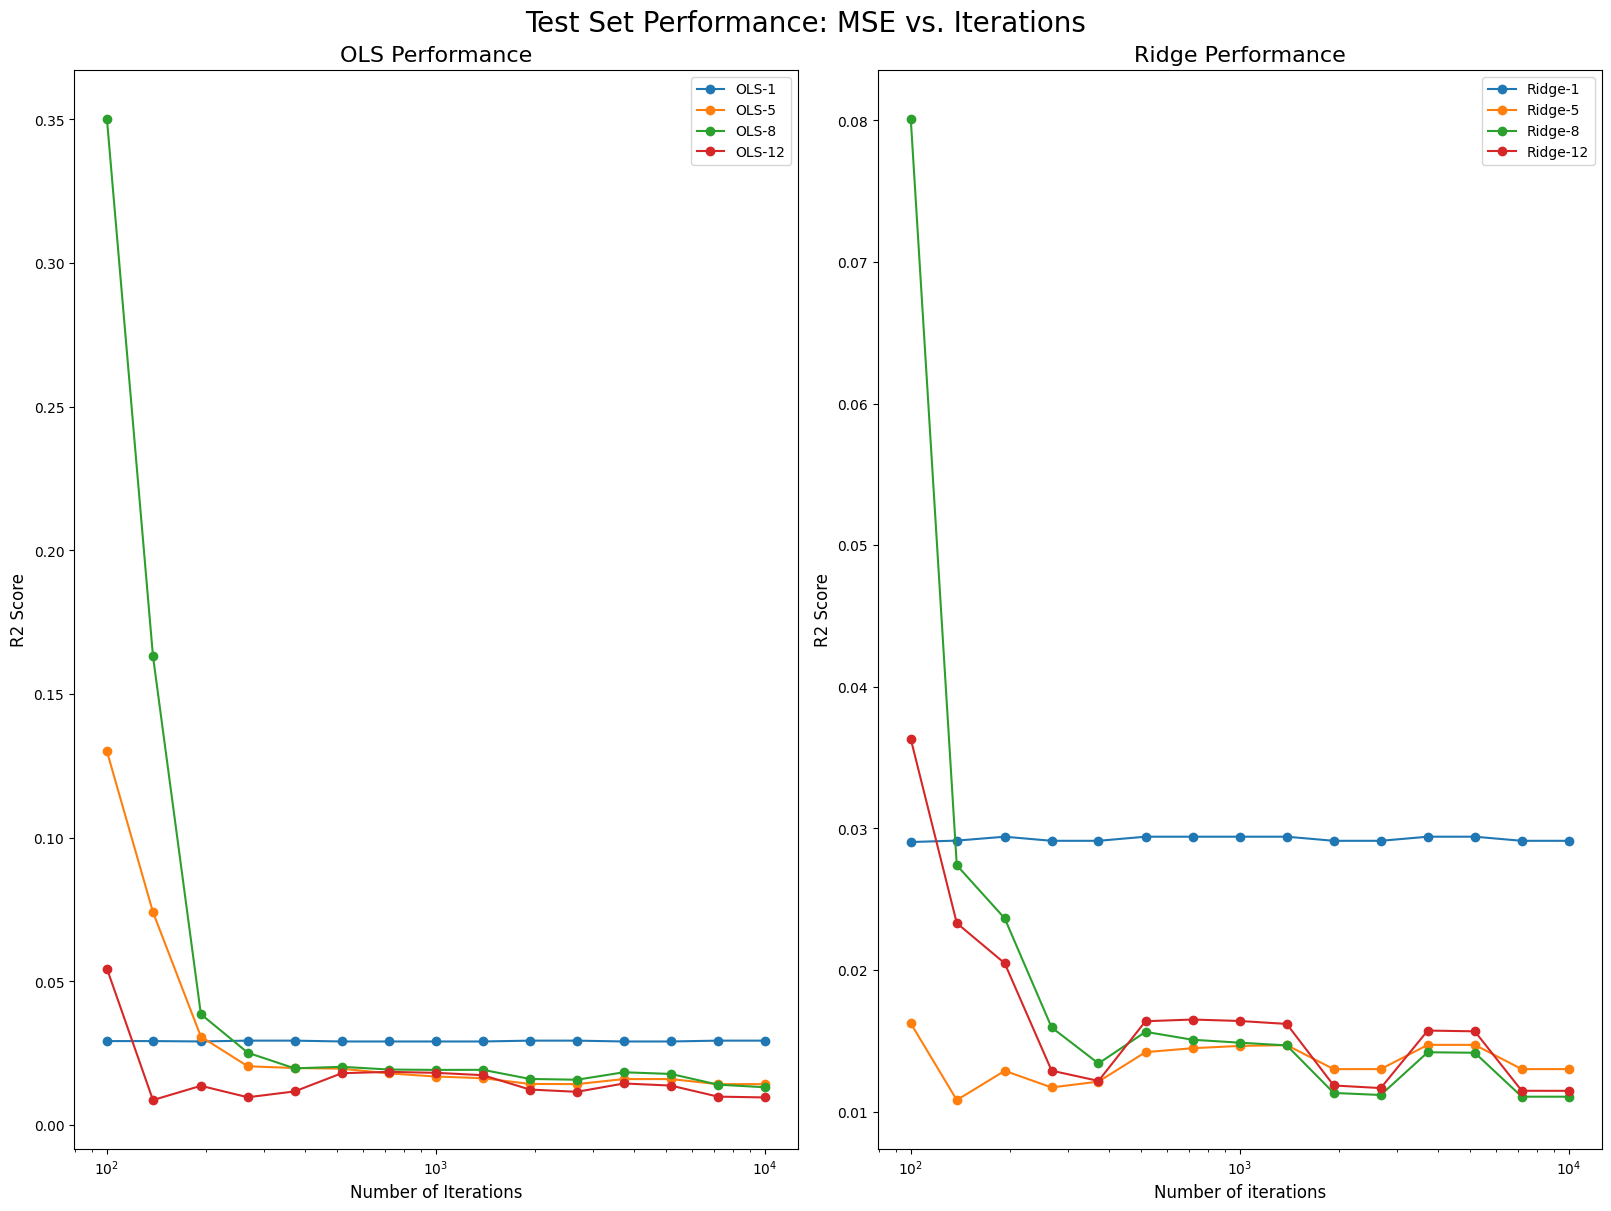

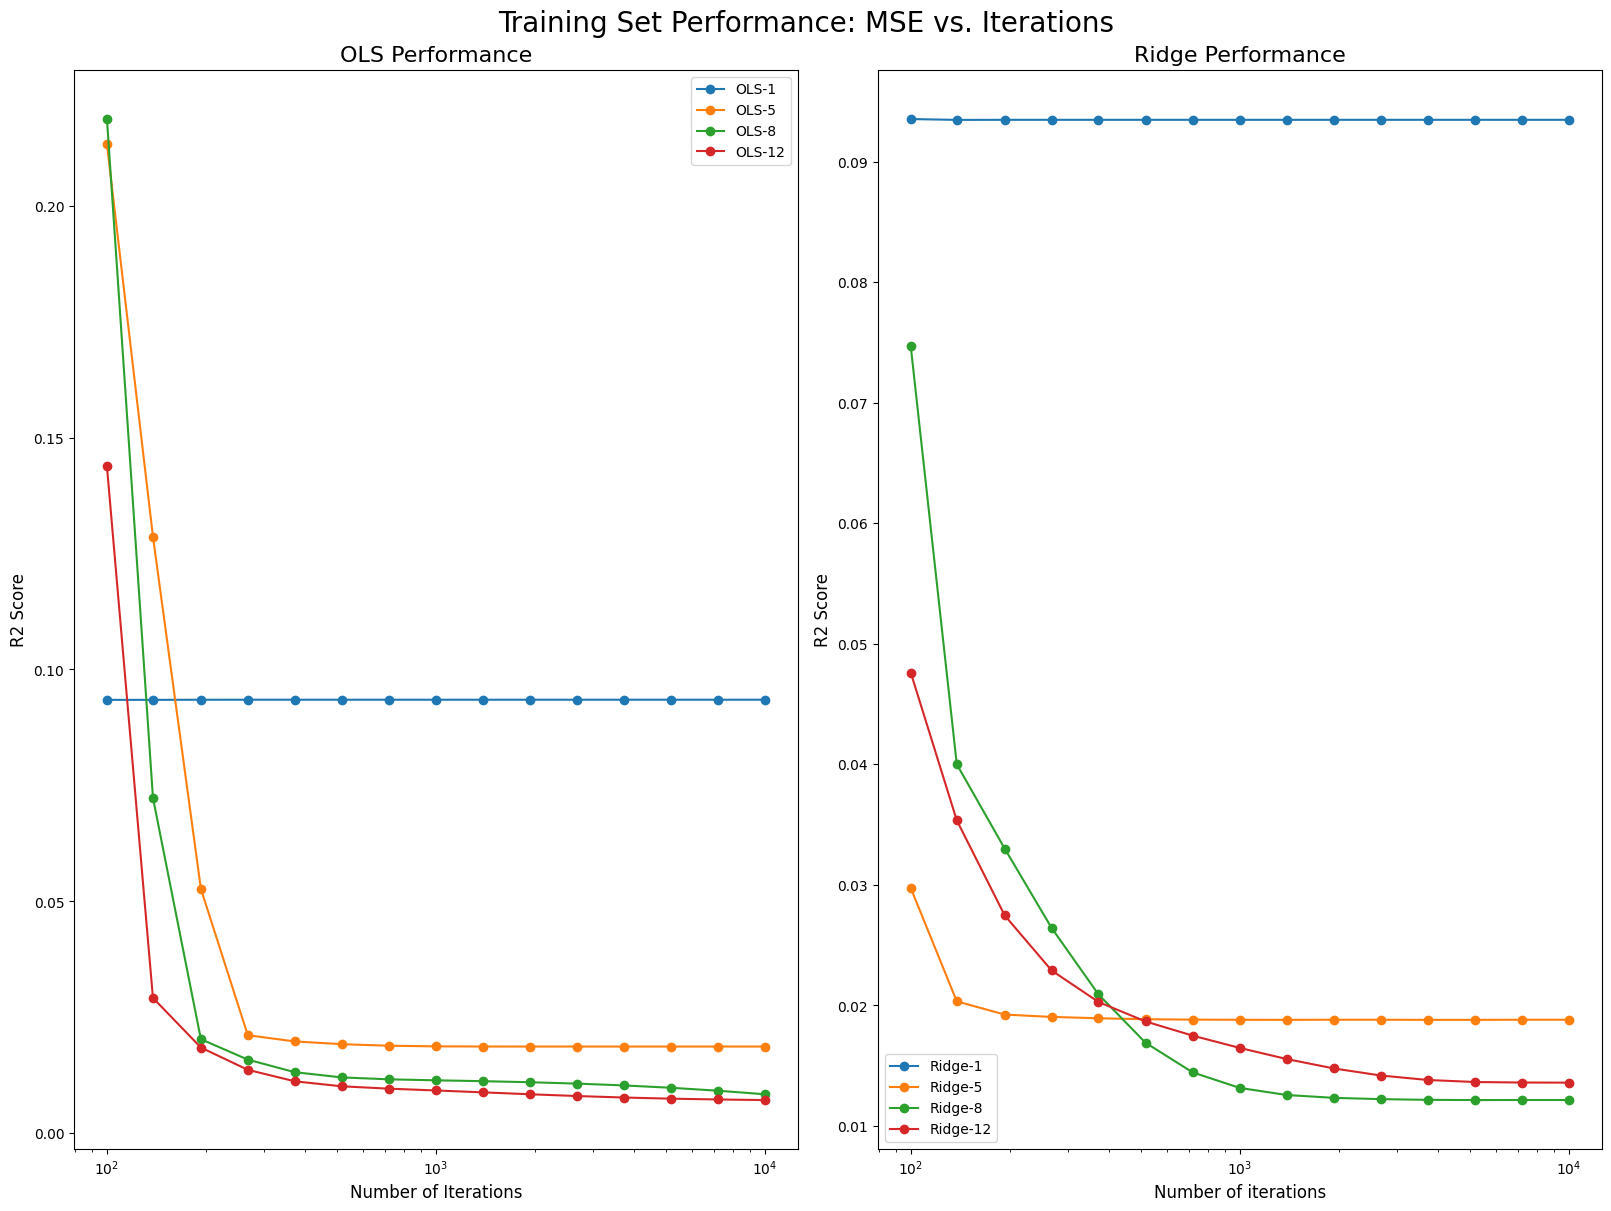

In [10]:
#RMSPROP

# Gradient descent parameters, regularization paramter
eta = 0.01
lam = 0.001
delta = 1e-8
beta = 0.9
# Then number of iterations
num_iters = 10000
degrees = [1,5,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)
        giter = np.zeros((X_train.shape[1],1))

        change = 0
        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad = Gradient_OLS(X_train, y_train, theta=theta)
            elif key =="Ridge":
                grad= Gradient_Ridge(X_train, y_train,  lambda_param=lam,theta=theta)
            giter = beta*giter + (1 -beta)*grad*grad
            change = eta /(np.sqrt(giter) + delta) * grad
            theta -= change

            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))

def plot_mse_vs_iterations(results_dict, title):
    """Helper function to plot MSE vs. iterations."""
    fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 12), constrained_layout=True)
    fig.suptitle(title, fontsize=20)
    for degree in degrees:
        ax1.plot(iter_saves, results_dict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")

        ax2.plot(iter_saves, results_dict["Ridge"][degree]["mse"], 'o-', label=f"Ridge-{degree}")
    
    ax1.set_title("OLS Performance", fontsize=16)
    ax1.set_xlabel("Number of Iterations", fontsize=12)
    ax1.set_xscale('log')
    ax1.set_ylabel("R2 Score", fontsize=12)
    ax1.legend(fontsize=10)

    ax2.set_title("Ridge Performance", fontsize=16)
    ax2.set_xlabel("Number of Iterations", fontsize=12)
    ax2.set_xscale('log')
    ax2.set_ylabel("R2 Score", fontsize=12)
    ax2.legend(fontsize=10)

    plt.xlabel("Number of iterations")
    plt.show()

plot_mse_vs_iterations(plot_predict, "Test Set Performance: MSE vs. Iterations")
plot_mse_vs_iterations(plot_train, "Training Set Performance: MSE vs. Iterations")


Now do this and see what happens when momentum is changed, perhaps also when:
- beta is changed
- Points are changed
- Learning rate is changed
- regularization for Ridge
- Dimensionality is changed

#### ADAM


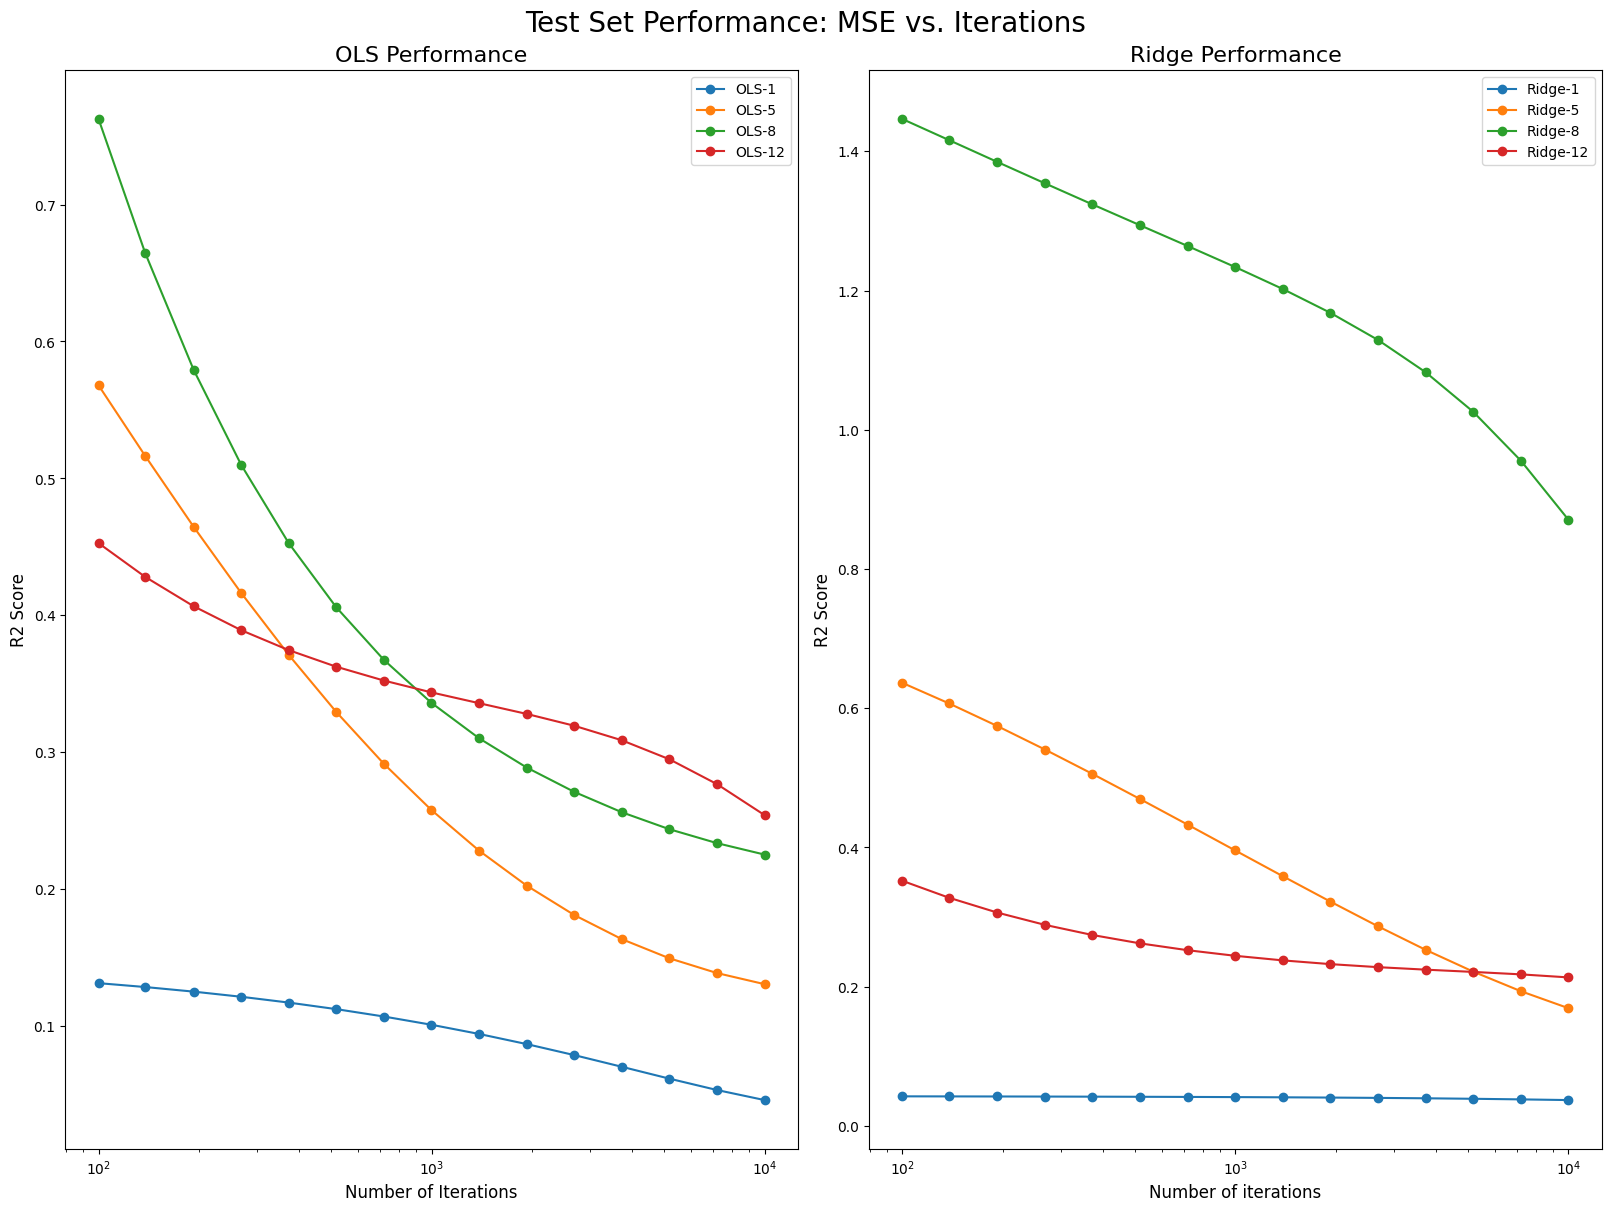

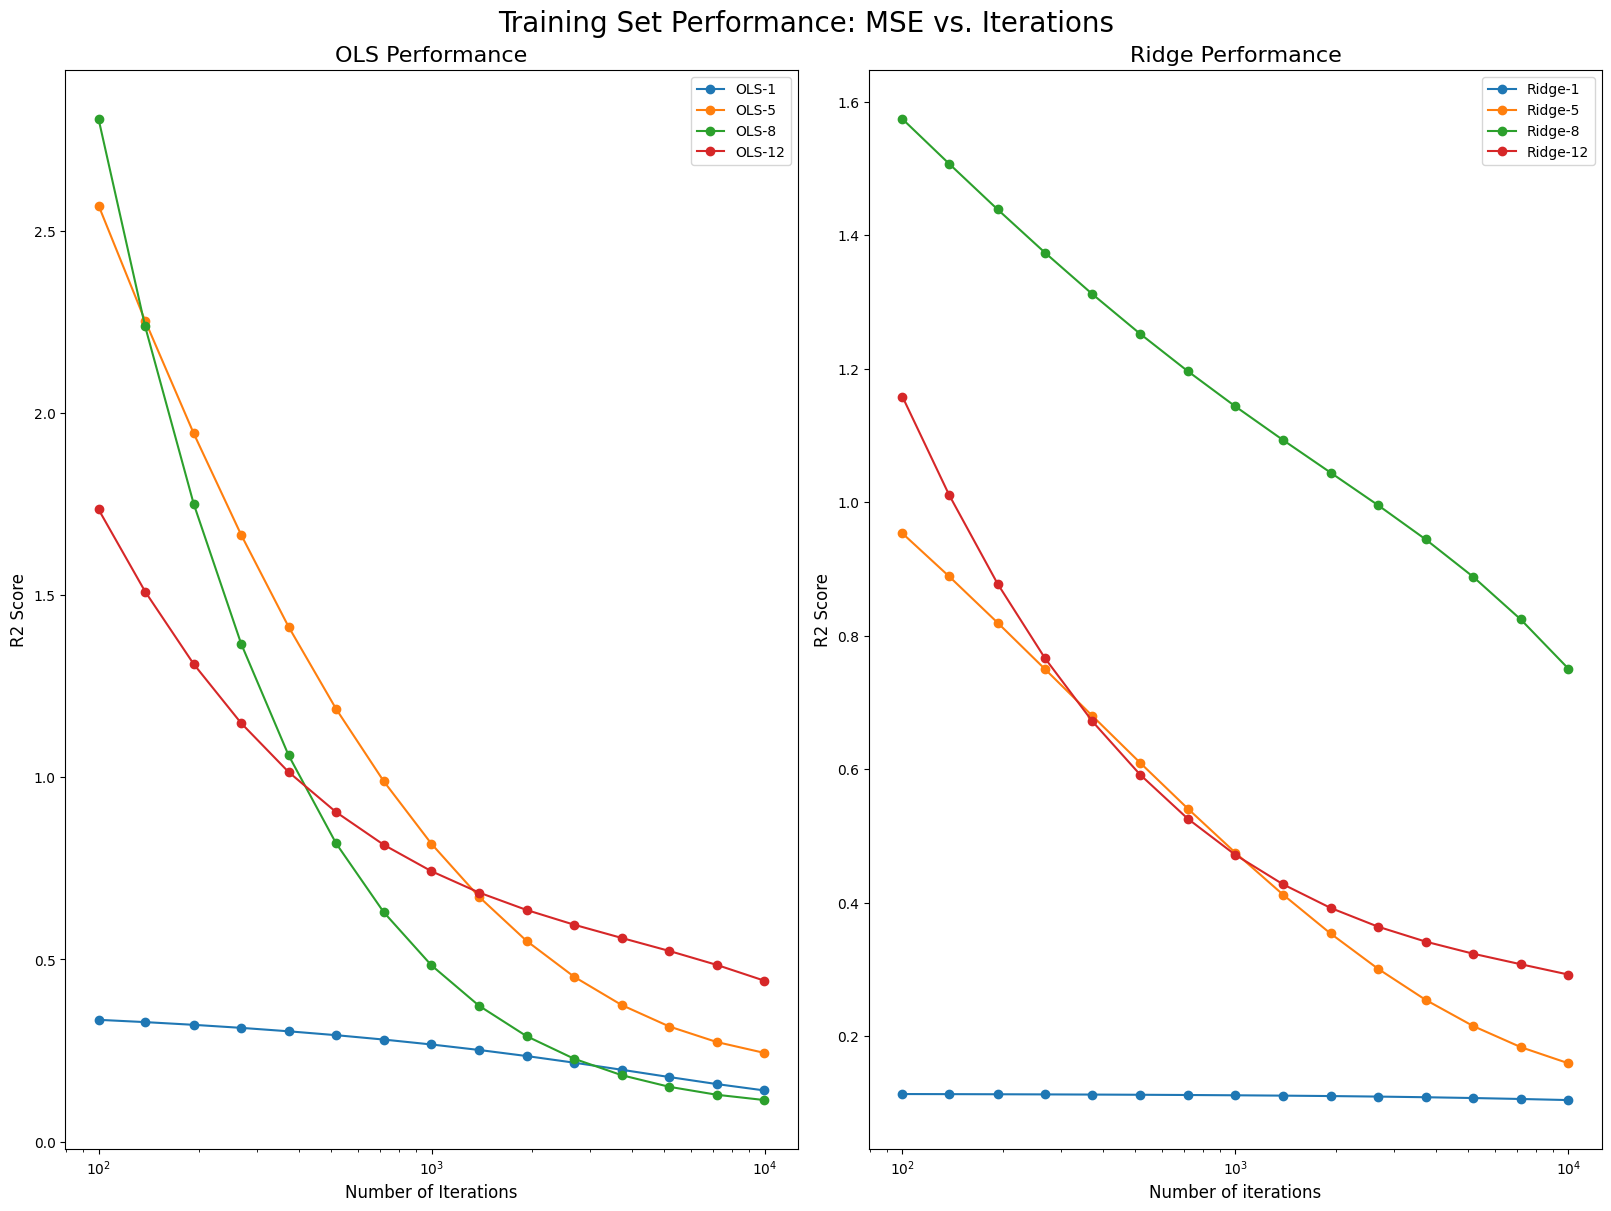

In [11]:
#ADAM

# Gradient descent parameters, regularization paramter
eta = 0.01
lam = 0.001
delta = 1e-8
beta1 = 0.9
beta2 = 0.999
# Then number of iterations
num_iters = 10000
degrees = [1,5,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)
        
        momentum1 = np.zeros((X_train.shape[1],1))
        momenumt2 = np.zeros((X_train.shape[1],1))
        

        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad = Gradient_OLS(X_train, y_train, theta=theta)
            elif key =="Ridge":
                grad= Gradient_Ridge(X_train, y_train,  lambda_param=lam,theta=theta)
            
            momentum1 = beta1*momentum1 + (1 -beta1)*grad
            momentum2 = beta2*momenumt2 + (1 -beta2)*grad*grad

            momentum1_corrected = momentum1 / (1 - beta1**(t+1))
            momentum2_corrected = momentum2 / (1 - beta2**(t+1))

            adaptive_change = eta /(np.sqrt(momentum2_corrected) + delta) * grad
            theta -= adaptive_change * momentum2_corrected 

            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))

def plot_mse_vs_iterations(results_dict, title):
    """Helper function to plot MSE vs. iterations."""
    fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 12), constrained_layout=True)
    fig.suptitle(title, fontsize=20)
    for degree in degrees:
        ax1.plot(iter_saves, results_dict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")

        ax2.plot(iter_saves, results_dict["Ridge"][degree]["mse"], 'o-', label=f"Ridge-{degree}")
    
    ax1.set_title("OLS Performance", fontsize=16)
    ax1.set_xlabel("Number of Iterations", fontsize=12)
    ax1.set_xscale('log')
    ax1.set_ylabel("R2 Score", fontsize=12)
    ax1.legend(fontsize=10)

    ax2.set_title("Ridge Performance", fontsize=16)
    ax2.set_xlabel("Number of Iterations", fontsize=12)
    ax2.set_xscale('log')
    ax2.set_ylabel("R2 Score", fontsize=12)
    ax2.legend(fontsize=10)

    plt.xlabel("Number of iterations")
    plt.show()

plot_mse_vs_iterations(plot_predict, "Test Set Performance: MSE vs. Iterations")
plot_mse_vs_iterations(plot_train, "Training Set Performance: MSE vs. Iterations")


Now do this and see what happens when momentum is changed, perhaps also when:
- momentum1 and momentum2
- Points are changed
- Learning rate is changed
- regularization for Ridge
- Dimensionality is changed